# Class and functions for moving the robot

In [19]:
from typing import List
from math import sin, cos, radians

class SkidRobot:
    def __init__(self, length, width) -> None:
        """Creates a robot

        Args:
            length (_type_): Uses Meters
            width (_type_): Uses Meters
        """
        self.length = length
        self.width = width
        self.x = 0.0
        self.y = 0.0
        self.theta = 0
    
    def move(self, Vl, Vr, dt=0.1):
        self.x -= (.5 * (Vl + Vr)) * sin(radians(self.theta)) * dt
        self.y += (.5 * (Vl + Vr)) * cos(radians(self.theta)) * dt
        self.theta += (1 / self.width) * (Vr - Vl) * dt
        
    def get_coords(self):
        return (self.x, self.y)
    
    def move_for_s(self, duration, Vl, Vr):
        path_x = []
        path_y = []
        
        # put loop in terms of dt = 0.1
        for _ in range(duration * 10):
            path_x.append(self.x)
            path_y.append(self.y)
            self.move(Vl, Vr)

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        return path_x, path_y

# Question 1

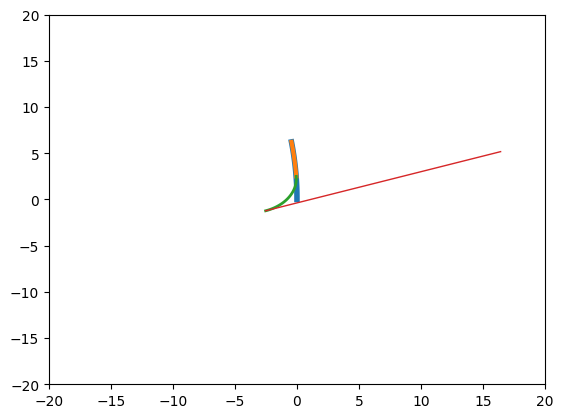

In [34]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = plt.axes(xlim=(-20,20), ylim=(-20,20))

# Run Robot
robo = SkidRobot(.5, .3)
x0, y0 = robo.move_for_s(5, 1, 1.5)
x1, y1 = robo.move_for_s(3, -1, -1.5)
x2, y2 = robo.move_for_s(8, .8, -2)
x3, y3 = robo.move_for_s(10, 2, 2)

line0, = ax.plot(x0, y0, lw=4)
line1, = ax.plot(x1, y1, lw=3)
line2, = ax.plot(x2, y2, lw=2)
line3, = ax.plot(x3, y3, lw=1)



# Question 2: 5m x 5m box

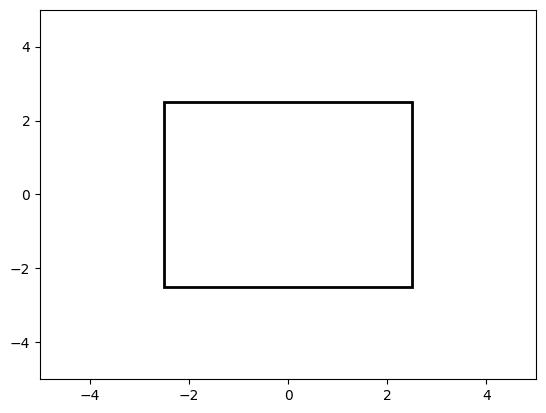

In [33]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.set_xbound(-5, 5)
ax.set_ybound(-5, 5)
x, y = (0,0)
ax.add_patch(Rectangle((0 - 2.5, 0 - 2.5), 5, 5, facecolor="none", ec='k', lw=2))
